# Question 1
(a) Take 1000 samples from a normal distribution $\mathcal{N}(0, 1)$. Denote these samples $ X $.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

X = np.random.normal(0,1,1000)

(b) You suspect a third party replaced some of your samples with samples drawn from a different normal distribution **with $\mu>0$**. Could you use statistical hypothesis testing to check? What would be the null hypothesis?

Yes, it is possible to do hypothesis testing to check if some of the samples were replaced. The null hypothesis would be considering the mean of the normal distribution equal to 0. 

(c) Perform hypothesis testing for $ \alpha=0.01, 0.05, 0.1, 0.2, 0.3 $. What is the proportion of rejected null hypothesis for each? Plot your results

1.5 % rejected for alpha = 0.01
9.1 % rejected for alpha = 0.05
18.9 % rejected for alpha = 0.1
39.2 % rejected for alpha = 0.2
57.7 % rejected for alpha = 0.3


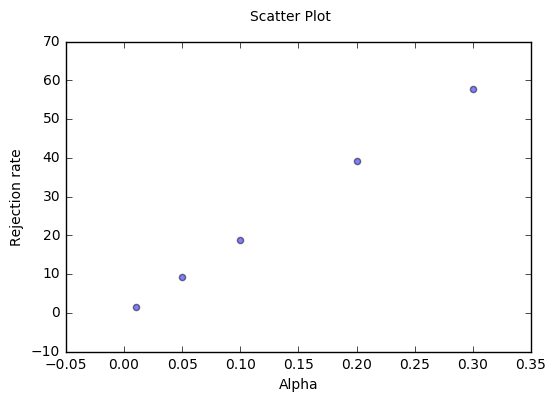

In [2]:
# Find the rejection rate
alpha_list = [0.01, 0.05, 0.1, 0.2, 0.3]
rejection_X_list = []
rejection_X_count = []
for alp in alpha_list:
    rejected_samples = 0
    for x in X:
        #stats.norm.sf gives 1 - cdf(x) of the normal distrbution
        p_value = stats.norm.sf(abs(x)) 
        if p_value < alp:
            rejected_samples += 1.0
    rejection_X_count.append(rejected_samples)     
    proportion_rejected = rejected_samples/len(X)
    rejection_X_list.append(proportion_rejected*100)
    print proportion_rejected*100,"% rejected for alpha =",alp
    
# Plot the chart
plt.scatter(alpha_list, rejection_X_list, s=20, alpha=0.5)
plt.suptitle('Scatter Plot')
plt.xlabel('Alpha')
plt.ylabel('Rejection rate')
plt.show()
    



(d) Take 1000 samples from a normal distribution $ \mathcal{N}(\mu, 1) $ with $\mu=1$. Denote these samples $ Y $. 

In [4]:
Y = np.random.normal(1,1,1000)

(e) For the $ \alpha $ values in (c) peform the **same** testing on $ Y $. Plot the ratio of null hypotheses rejected in $ X $ to the number of elements in $ Y $ against the ratio of null hypotheses rejected in $ Y $ to the number of elements in $ Y $.

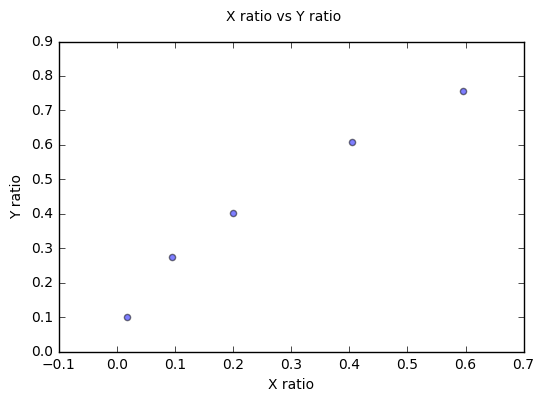

In [5]:
# Find the rejection rate
rejection_Y_list = []
rejection_Y_count = []
for alp in alpha_list:
    rejected_samples = 0
    for y in Y:
        p_value = stats.norm.sf(abs(y)) 
        if p_value < alp:
            rejected_samples += 1.0
    rejection_Y_count.append(rejected_samples)     
    proportion_rejected = rejected_samples/len(Y)
    rejection_Y_list.append(proportion_rejected*100)
    
# List the ratios of rejection
list_ratio_rejection_X = [v/len(Y) for v in rejection_X_count]
list_ratio_rejection_Y = [v/len(Y) for v in rejection_Y_count]

# Plot the chart
plt.scatter(list_ratio_rejection_X, list_ratio_rejection_Y, s=20, alpha=0.5)
plt.suptitle('X ratio vs Y ratio')
plt.xlabel('X ratio')
plt.ylabel('Y ratio')
plt.show()
    
    

A plot of false positive rate Vs. true positive rate (in binary classification) is known as a ROC curve. 
A ROC curve shows the balance between the two rates for a given model, enabling an informed choice. 

(f) Repeat question (d) and (e) for $ \mu=0.1, 0.3, 0.5, 1.5 $. Plot ROC curves for all options. 


Explain the difference in the curves: 
- Is the problem harder for some $ \mu $ values? 
- How is that visible from the curves?
- For a single curve, how would you choose an optimal $ \alpha $ value?

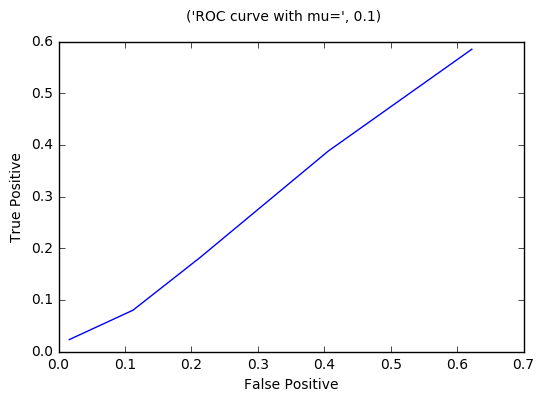

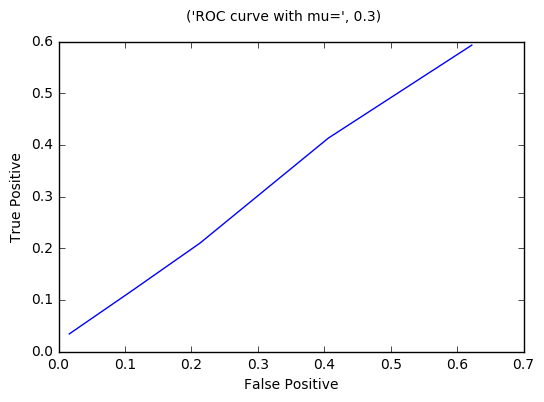

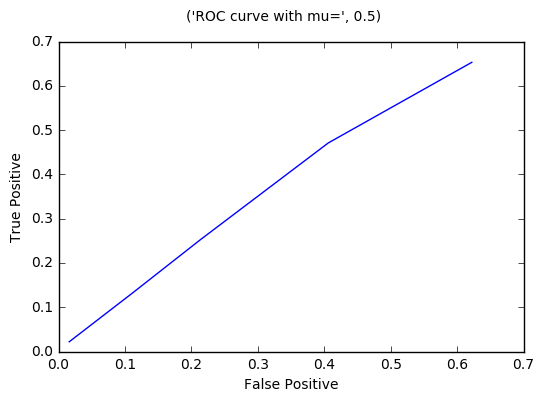

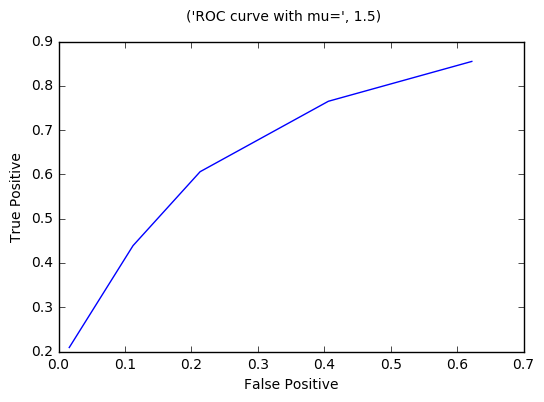

In [3]:
means_list = [0.1,0.3,0.5,1.5]
for mu in means_list:
    S = np.random.normal(mu,1,1000)
    
    rejection_mu_list = []
    rejection_mu_count = []
    for alp in alpha_list:
        rejected_samples = 0
        for s in S:
            p_value = stats.norm.sf(abs(s)) 
            if p_value < alp:
                rejected_samples += 1.0
        rejection_mu_count.append(rejected_samples)     
        proportion_rejected = rejected_samples/len(S)
        rejection_mu_list.append(proportion_rejected*100)

    # List the ratios of rejection
    list_ratio_rejection_X = [v/len(S) for v in rejection_X_count]
    list_ratio_rejection_mu = [v/len(S) for v in rejection_mu_count]

    # Plot the ratios chart
    plt.plot(list_ratio_rejection_X, list_ratio_rejection_mu)
    title = "ROC curve with mu=",mu
    plt.suptitle(title)
    #Reject true values sampled from X distribution
    plt.xlabel('False Positive') 
    #Reject values that are not sampled from the X distribution
    plt.ylabel("True Positive")
    plt.show()
    


- Is the problem harder for some $ \mu $ values? 

Answer: When the value of $ \mu $ is closer to 0, it's harder to detect and reject samples that were were not taken from a normal distribution with  $ \mu $ = 0.
- How is that visible from the curves?

Answer: The curves where $ \mu $ closer to one have the ratio of rejection similar to the rejection ration of the original X sample. Curves that are similar to a straight line are the ones that represent the harder situations.

- For a single curve, how would you choose an optimal $ \alpha $ value?

Answer: When you select a higher threshold value for alpha, the false positive fraction will decrease with increased specificity but on the other hand the true positive fraction and sensitivity will decrease. When you select a lower threshold value for alpha, then the true positive fraction and sensitivity will increase. On the other hand the false positive fraction will also increase, and therefore the true negative fraction and specificity will decrease. In summary, the choosing of the alpha parameter depends on each situation.


# Question 2
$$
\begin{aligned}
&X=\left\{X_i\right\}_{i=1}^{1000},\:\: X_i \sim \mathcal{N}(0, 1)\\
&Y=\left\{Y_i\right\}_{i=1}^{1000},\:\: Y_i \sim \mathcal{N}(1, 1)\\
&\alpha = 0.01, 0.05, 0.1, 0.2, 0.3
\end{aligned}
$$

(a) Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [7]:
# Setup Parameters
alp = 0.05
number_iterations = 2000
count_at_least_one_rejected = 0

# Run the experiment
for it in xrange(number_iterations):
    X = np.random.normal(0,1,1000)
    rejected_samples = 0
    for x in X:
        p_value = stats.norm.sf(abs(x)) 
        if p_value < alp:
            rejected_samples += 1.0
    if rejected_samples > 0:
        count_at_least_one_rejected += 1.0
            
#Print desired Ratio
print count_at_least_one_rejected / float(number_iterations)


1.0


(b) Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $ and apply the Bonferroni correction. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [6]:
# Setup Parameters
alp = 0.05
number_iterations = 2000
count_at_least_one_rejected = 0

# Run the experiment
for it in xrange(number_iterations):
    X = np.random.normal(0,1,1000)
    rejected_samples = 0
    for x in X:
#       Add the Bonferroni correction
        p_value = stats.norm.sf(abs(x)) 
        if p_value < alp/len(X):
            rejected_samples += 1.0
    if rejected_samples > 0:
        count_at_least_one_rejected += 1.0
            
#Print desired Ratio
print count_at_least_one_rejected / float(number_iterations)

0.092


(c) For all $ \alpha $ values peform testing on $ V = (X, Y) $, with and without using the Bonferroni correction. Repeat the process 2000 times and average results. Plot the ROC curves on the separate plots. 

hint: what is $ m $, the number of experiments?

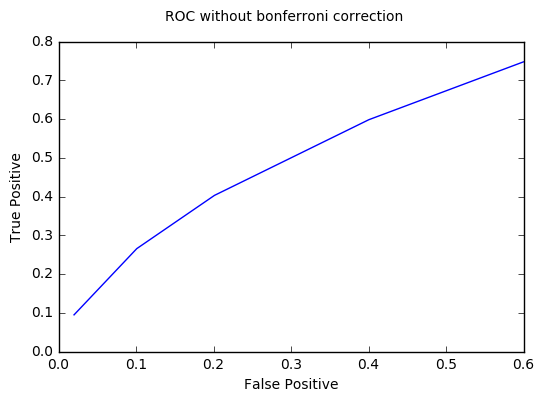

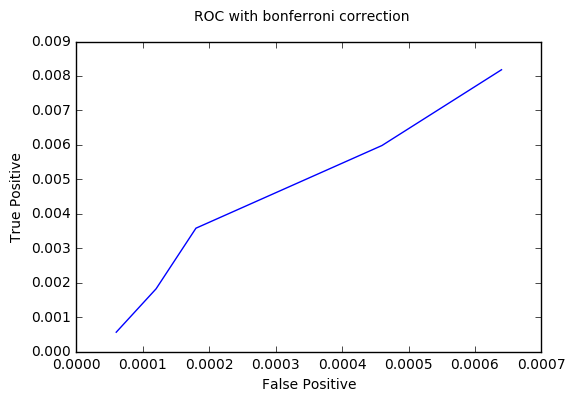

In [3]:
def perform_V_Test(use_bonferroni_correction):
    
    alpha_list = [0.01, 0.05, 0.1, 0.2, 0.3]
    number_iterations = 2000

    collection_X_rejections = []
    collection_Y_rejections = []

    # Scenario without Bonferroni correction
    for it in xrange(number_iterations):
        rejection_X_count = []
        rejection_Y_count = []
        X = np.random.normal(0,1,1000)
        Y = np.random.normal(1,1,1000)
        for alp in alpha_list:
            rejected_X_samples = 0
            rejected_Y_samples = 0
            
#           Consider or not bonferroni correction
            correction_parameter = 1
            if use_bonferroni_correction == 1:
                correction_parameter = len(X)
                
            for x in X:
                p_value = stats.norm.sf(abs(x)) 
                if p_value < alp/correction_parameter:
                    rejected_X_samples += 1.0

            for y in Y:
                p_value = stats.norm.sf(abs(y)) 
                if p_value < alp/correction_parameter:
                    rejected_Y_samples += 1.0

            rejection_X_count.append(rejected_X_samples) 
            rejection_Y_count.append(rejected_Y_samples)


        # List the ratios of rejection
        list_ratio_rejection_X = [v/len(Y) for v in rejection_X_count]
        list_ratio_rejection_Y = [v/len(Y) for v in rejection_Y_count]

        # Add to glocal list to get the average later    
        collection_X_rejections.append(list_ratio_rejection_X) #False positives
        collection_Y_rejections.append(list_ratio_rejection_Y) #True positives

    # Get the average for for false positive and true positives
    avg_false_positives = []
    avg_true_positives = []
    for it in xrange(0,len(alpha_list)):
        temp_avg = sum([c[it] for c in collection_X_rejections])/len(collection_X_rejections)
        avg_false_positives.append(temp_avg)

        temp_avg = sum([c[it] for c in collection_Y_rejections])/len(collection_Y_rejections)
        avg_true_positives.append(temp_avg)

    # Plot the ratios chart
    plt.plot(avg_false_positives, avg_true_positives)
    if use_bonferroni_correction == 0:
        title = "ROC without bonferroni correction"
    else:
        title = "ROC with bonferroni correction"
    plt.suptitle(title)
    plt.xlabel('False Positive') 
    plt.ylabel("True Positive")
    plt.show()
    
# Perform both V tests
perform_V_Test(0)
perform_V_Test(1)



# Question 3

(a) Use the given implementation of the Benjamini-Hochberg (BH) procedure. For $ \alpha = 0.05 $ compute the FDR (false discovery rate) with and without the BH procedure. Repeat 2000 times. What is the FDR with and without correction? What is the average number of true detections?

Bonus: what are these values for the Bonferroni correction?

In [13]:
def BH_procedure(X, Y, alpha=0.05):
 '''
 receive two row vectors X and Y and a significance level alpha. 
 null hypotheses is that all samples are drawn from N(0, 1).
 X is assumed to be sampled from H0 and Y sampled from H1 (mu>0)
 
 :param X: numpy row vector
 :param Y: numpy row vector
 
 :returns discovery_count: number of rejected null hypotheses
 :returns false_discovery_count: number of rejected null hypotheses
 ''' 
 
 pvals = 1 - stats.norm.cdf(np.hstack((X, Y)))
 sort_inds = np.argsort(pvals)[::-1]
 
 m = X.size + Y.size
 
 for ind, sort_ind in enumerate(sort_inds):
     if pvals[sort_ind] <= float(m - ind)/(m) * alpha:
         break
 
 discovery_count = m - ind
 false_discovery_count = np.sum(sort_inds[ind:] < X.size - 1)
 
 return discovery_count, false_discovery_count

In [40]:
number_of_repetitions = 2000
alpha = 0.05

false_dis_prop_with_BH_corr_list = []
false_dis_prop_with_Bonferroni_corr_list = []
false_dis_prop_without_corr_list = []

for it in xrange(number_of_repetitions):
    X = np.random.normal(0,1,1000)
    Y = np.random.normal(1,1,1000)

#   Discover proportion of false discover with BH correction
    (discovery_count,false_discovery_count) = BH_procedure(X, Y, alpha)
    Q_with_BH_corr = false_discovery_count / discovery_count
    false_dis_prop_with_BH_corr_list.append(Q_with_BH_corr)
    
#   Discover proportion of false discover without correction
    rejected_X_samples = 0
    rejected_Y_samples = 0

    for x in X:
        p_value = stats.norm.sf(abs(x)) 
        if p_value < alpha:
            rejected_X_samples += 1.0

    for y in Y:
        p_value = stats.norm.sf(abs(y)) 
        if p_value < alpha:
            rejected_Y_samples += 1.0
            
    Q_whitout_corr = 0
    if (rejected_X_samples+rejected_Y_samples) > 0:
        Q_whith_Bonferronit_corr = rejected_X_samples / (rejected_X_samples+rejected_Y_samples)
            
    Q_whitout_corr = rejected_X_samples / (rejected_X_samples+rejected_Y_samples)
    false_dis_prop_without_corr_list.append(Q_whitout_corr)
    
#   Discover proportion of false discover with Bonferroni correction
    rejected_X_samples = 0
    rejected_Y_samples = 0

    correction_parameter = len(X)
    for x in X:
        p_value = stats.norm.sf(abs(x)) 
        if p_value < alpha/correction_parameter:
            rejected_X_samples += 1.0

    for y in Y:
        p_value = stats.norm.sf(abs(y)) 
        if p_value < alpha/correction_parameter:
            rejected_Y_samples += 1.0
            
    Q_whith_Bonferronit_corr = 0
    if (rejected_X_samples+rejected_Y_samples) > 0:
        Q_whith_Bonferronit_corr = rejected_X_samples / (rejected_X_samples+rejected_Y_samples)
    
    false_dis_prop_with_Bonferroni_corr_list.append(Q_whith_Bonferronit_corr)

FCR_whithout_corr = np.mean(false_dis_prop_with_BH_corr_list)
FCR_with_BH_corr = np.mean(false_dis_prop_without_corr_list)
FCR_with_BonFerroni_corr = np.mean(false_dis_prop_with_Bonferroni_corr_list)

print "FCR with no correction:",FCR_whithout_corr
print "FCR with BH correction:",FCR_with_BH_corr
print "FCR with Bonferroni correction:",FCR_with_BonFerroni_corr
            

FCR with no correction: 0.02
FCR with BH correction: 0.272896402779
FCR with Bonferroni correction: 0.0614285714286


(b) Repeat Question 2 (c) with the BH procedure correction instead of Bonferroni.

Bonus: compare against result for Bonferroni

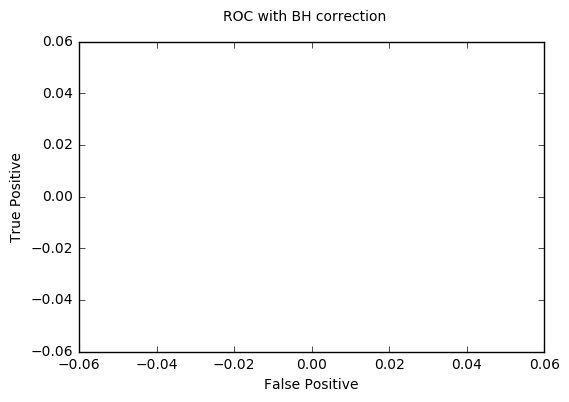

In [15]:
def perform_V_BH_Test():
    
    alpha_list = [0.01, 0.05, 0.1, 0.2, 0.3]
    number_iterations = 100

    collection_X_rejections = []
    collection_Y_rejections = []

    for it in xrange(number_iterations):
        rejection_X_count = []
        rejection_Y_count = []
        X = np.random.normal(0,1,1000)
        Y = np.random.normal(1,1,1000)
        for alp in alpha_list:
            
#           Procedure with BH correction
            (discovery_count,false_discovery_count) = BH_procedure(X, Y, alp)
            rejection_X_count.append(discovery_count) 
            rejection_Y_count.append(discovery_count-false_discovery_count)
            
        # List the ratios of rejection
        list_ratio_rejection_X = [v/len(Y) for v in rejection_X_count]
        list_ratio_rejection_Y = [v/len(Y) for v in rejection_Y_count]
        
        # Add to glocal list to get the average later    
        collection_X_rejections.append(list_ratio_rejection_X) #False positives
        collection_Y_rejections.append(list_ratio_rejection_Y) #True positives

    # Get the average for for false positive and true positives
    avg_false_positives = []
    avg_true_positives = []
    for it in xrange(0,len(alpha_list)):
        temp_avg = sum([c[it] for c in collection_X_rejections])/len(collection_X_rejections)
        avg_false_positives.append(temp_avg)

        temp_avg = sum([c[it] for c in collection_Y_rejections])/len(collection_Y_rejections)
        avg_true_positives.append(temp_avg)


    # Plot the ratios chart
    plt.plot(avg_false_positives, avg_true_positives)
    title = "ROC with BH correction"
    plt.suptitle(title)
    plt.xlabel('False Positive') 
    plt.ylabel("True Positive")
    plt.show()
    
# Perform both V tests
perform_V_BH_Test()

"""For the procedure with the BH correction no rejection happened for any value of alpha.
    In the case of the bonferroni correction, all the values of alpha generates rejections both for X and Y"""
